# Titanic Data Analysis
## 1. Introduction

In this project I will perform a data analysis on the sample Titanic dataset. The dataset contains
demographics and passenger information of 891 out of the 2224 passengers and crew members on board the Titanic.
The data was obtained at https://www.kaggle.com/c/titanic/data.

In my analysis I will examine the factors what may have increased the chances of survival. I will particularly focus on the following questions:

* Did the gender determine the chances of survival?
* Did the social-economic status determine the chances of survival?
* Did the age considering the gender determine the chances of survival?
* Did age, regardless of gender, determine your chances of survival?
* Did the number of children aboard per passenger determine the chances of survival?

## 2. Data Wrangling

### 2.1 Data Discription

The data contains following information:

* `survival`: Survival (0 = No; 1 = Yes)
* `pclass`: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* `name`: Name
* `sex`: Gender
* `age`: Age
* `sibsp`: Number of Siblings/Spouses Aboard
* `parch`: Number of Parents/Children Aboard
* `ticket`: Ticket Number
* `fare`: Passenger Fare
* `cabin`: Cabin
* `embarked`: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)




Here are the first five rows of the dataframe to give an simple overview over the data.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

titanic=pd.read_csv("titanic-data.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.2 Data Cleanup

The data cleanup procedure consists of the follwing steps:
1. Removal of unnecessary data
2. Removal of duplicates
3. Determine missing values in the data


Based on the question I want to answer in the project some of the columns in the dataset will not be important in further 
examination, therefore they will be removed. These columns are:
    
* `Name`
* `Ticket`
* `Cabin`
* `Embarked`
* `sibsp`


Following code lines remove the mentioned rows and show the first five rows of the dataframe to show that the unnecessary data was removed.

In [3]:
# Create new dataset without unwanted columns
titanic=titanic.drop(['Name','Ticket','Cabin','Embarked','SibSp'], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare
0,1,0,3,male,22.0,0,7.2500
1,2,1,1,female,38.0,0,71.2833
2,3,1,3,female,26.0,0,7.9250
3,4,1,1,female,35.0,0,53.1000
4,5,0,3,male,35.0,0,8.0500



Here I want to identify duplicates in the data.

In [4]:
# Identify if duplicates in the data do exists
titanic_duplicates = titanic.duplicated()
print('Number of duplicates: {}'.format(titanic_duplicates.sum()))

Number of duplicates: 0


In the dataset there are no data duplicates.


### 2.3 Missing Values

In this subsection I want to find out how many missing values there are in the dataframe.

In [5]:
# Calculating the number of missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Parch            0
Fare             0
dtype: int64

In [6]:
# Determine the number of males and females with missing age in the dataset
missing_age_male = titanic[pd.isnull(titanic['Age'])]['Sex'] == 'male'
missing_age_female = titanic[pd.isnull(titanic['Age'])]['Sex'] == 'female'

print('Number of male passengers with missing age: {}'.format(missing_age_male.sum()))
print('Number of female passengers with missing age: {}'.format(missing_age_female.sum()))

Number of male passengers with missing age: 124
Number of female passengers with missing age: 53


We can see that roughly 20% of the passengers in the dataset do not have a stated age, especialy the male passengers. This fact should be considered on examination of the question whether the age considering the gender determine the chances of survival.




## 3. Data Analysis


At first I want to gain a basic overview over the age distribution, the count of female and male as well as the count of survived and dead passengers.

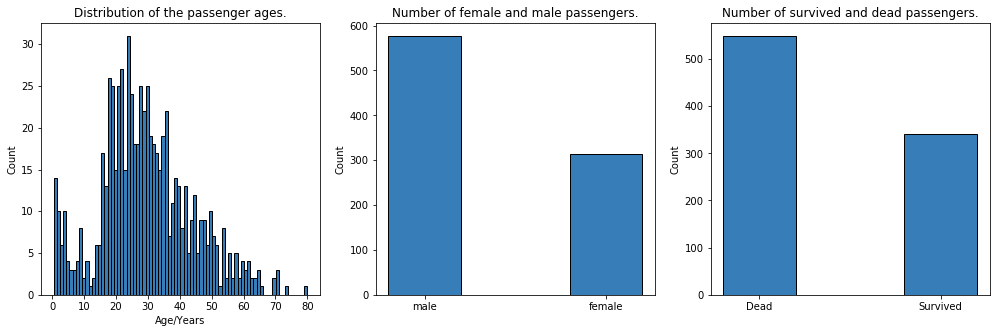

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5)) 

#Age distribution
ages=titanic["Age"].dropna()
#plt.figure(figsize=(7,7))
axes[0].hist(ages, bins=80, color='#377eb8',edgecolor = "Black")
axes[0].set_xlabel("Age/Years")
axes[0].set_ylabel('Count')
axes[0].set_title('Age distribution of the passengers')
#plt.show()


# Count of male and female passengers
gender=titanic['Sex']
counts = Counter(gender)
common = counts.most_common()
gender = [item[0] for item in common]
count = [item[1] for item in common]

axes[1].bar(np.arange(2), count, tick_label=gender, width=0.4, color='#377eb8',edgecolor = "Black")
axes[1].set_ylabel('Count')
axes[1].set_title('Number of female and male passengers.')


# Count of dead and survived passengers
survival=titanic['Survived']
counts=Counter(survival)
common = counts.most_common()
label=["Dead", "Survived"]
count=[item[1] for item in common]
axes[2].bar(np.arange(2), count, tick_label=label, width=0.4, color='#377eb8',edgecolor = "Black")
axes[2].set_ylabel('Count')
axes[2].set_title('Number of survived and dead passengers.')
plt.show()

The age distribution can be approximated as a gaussian distribution with a mean around 25-30 years.
In the second plot can be noticed that there were almost twice as much male as female passengers. The third plot shows that there were mored deads than survivals.


### 3.1 Did the gender determine the chances of survival?

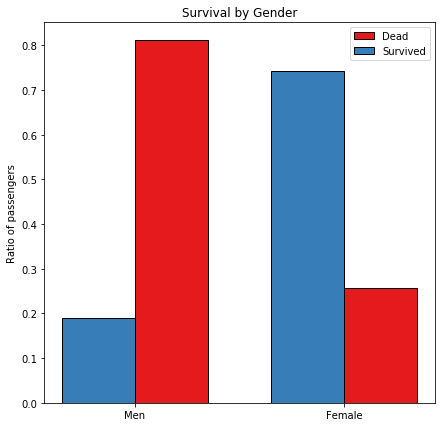

In [6]:
# Group thy PassengerId by Gender und Survival
g=titanic.groupby(["Survived","Sex"])["PassengerId"]

# Count how many passengers died or survived dependent on the gender
survived_men=g.get_group((1,"male")).count()
survived_women=g.get_group((1,"female")).count()
dead_men=g.get_group((0,"male")).count()
dead_women=g.get_group((0,"female")).count()

# Group the PassengerId by gender and count the Id's dependent on the gender to find out the total number of women and men
g=titanic.groupby("Sex")["PassengerId"]
men_sum=float(g.get_group(("male")).count())
women_sum=float(g.get_group(("female")).count())

#Normalization of dead and survived passengers depentend on the gender
p2=survived=[survived_men/men_sum, survived_women/women_sum] 
p1=dead=[dead_men/men_sum, dead_women/women_sum]

# Plot the survival by gender ration 
plt.figure(figsize=(7,7))
N=2
ind = np.arange(N)               
width = 0.35                      
bar1 = plt.bar(ind, survived, width,color='#377eb8', edgecolor = "Black")
bar2 = plt.bar(ind+width, dead, width,color='#e41a1c', edgecolor = "Black")
plt.ylabel('Ratio of passengers')
plt.title('Survival by Gender')
plt.xticks(ind+width/2, ['Men', "Female"])
plt.legend((bar2, bar1), ('Dead', 'Survived'))
plt.figure(num=None, figsize=(1, 1), dpi=80, facecolor='w', edgecolor='k')
plt.show()


According to the plot it is obvious that male passengers had a significant lower chance of survival in comparison to female passengers. 

### 3.2 Did the social-economic status determine the chances of survival?

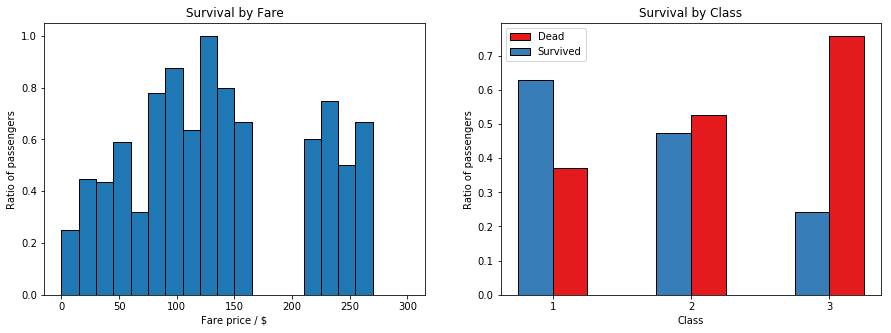

In [7]:
################################ Survival regarding the fare ##########################
# Create a dataframe of all fares
fares_df=titanic[["Fare", "Survived"]]
fares=titanic["Fare"]

# Create 20 fare ranges from 0 $ - 300 $ and count how many fares from fares_df belong to each range
num_bins=20
bar_width=300/float(num_bins)
fare_ranges_all=[]
for i in np.arange(0,num_bins,1):
    fare_ranges_all.append(len([x for x in fares if i*bar_width <= x < (i+1)*bar_width]))

# Create a dataframe with fares of passengers who survived
survived_fares=fares_df.ix[(fares_df["Survived"]==1)]["Fare"]

# Determine how many fares of passengers who survived belong in each of the 20 ranges 
fare_ranges_survived=[]
for i in np.arange(0,num_bins,1):
    fare_ranges_survived.append(len([x for x in survived_fares if i*bar_width <= x < (i+1)*bar_width]))

# Handle the case in which a fare range does not contain any counts (to avoid devide by null error during normalization)
for n,i in enumerate(fare_ranges_all):
    if i==0:
      fare_ranges_all[n]=1
 
 
################################ Survival regarding the class ##########################
 
# Get the Groupby object 
g=titanic.groupby(["Survived","Pclass"])

# Count the passengers from each class who not have survived
dead_class_1=g.get_group((0,1))["PassengerId"].count()
dead_class_2=g.get_group((0,2))["PassengerId"].count()
dead_class_3=g.get_group((0,3))["PassengerId"].count()

# Count the passengers from each class who  have survived
survived_class_1=g.get_group((1,1))["PassengerId"].count()
survived_class_2=g.get_group((1,2))["PassengerId"].count()
survived_class_3=g.get_group((1,3))["PassengerId"].count()

# Get the Groupby object
g=titanic.groupby(["Pclass"])
# Count the passengers in each class
passengers_class1=float(g.get_group((1))["PassengerId"].count())
passengers_class2=float(g.get_group((2))["PassengerId"].count())
passengers_class3=float(g.get_group((3))["PassengerId"].count())






# Plot the fare-survival relation

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))  
fare_ranges_all=np.array(fare_ranges_all).astype(float)

#Normalize the number of fares in each range
normed_survived_fares=np.array(fare_ranges_survived)/fare_ranges_all
axes[0].bar(np.arange(0, 300,bar_width)+bar_width/2.0,normed_survived_fares,width=bar_width, align="center", edgecolor = "Black")
axes[0].set_title("Survival by Fare")
axes[0].set_xlabel("Fare price / $")
axes[0].set_ylabel("Ratio of passengers")


# Plot the class-survival relation
y1, y2, y3=dead_class_1/passengers_class1, dead_class_2/passengers_class2, dead_class_3/passengers_class3
z1, z2, z3=survived_class_1/passengers_class1, survived_class_2/passengers_class2, survived_class_3/passengers_class3
dead=[y1, y2, y3]
survived=[z1, z2, z3]
width=0.25
ind = np.arange(3) 
bar1 = axes[1].bar(ind, survived, width,color='#377eb8', edgecolor = "Black")
bar2 = axes[1].bar(ind+width, dead, width,color='#e41a1c', edgecolor = "Black")
axes[1].legend((bar2, bar1), ('Dead', 'Survived'))
axes[1].set_title("Survival by Class")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Ratio of passengers")
axes[1].set_xticks(ind+width/2)
axes[1].set_xticklabels(["1", "2", "3"])
plt.show()


The left plot shows the tendency that a lower fare price decreases the ratio of survival. In the right plot a steady declination of the survival ration with lower passenger class can be observed. Im summary the social-economic status has indeed an impact on the chances of survival. Passengers with higher social-economic status did have a higher chances to survive.

### 3.3 Did age, regardless of gender, determine your chances of survival?

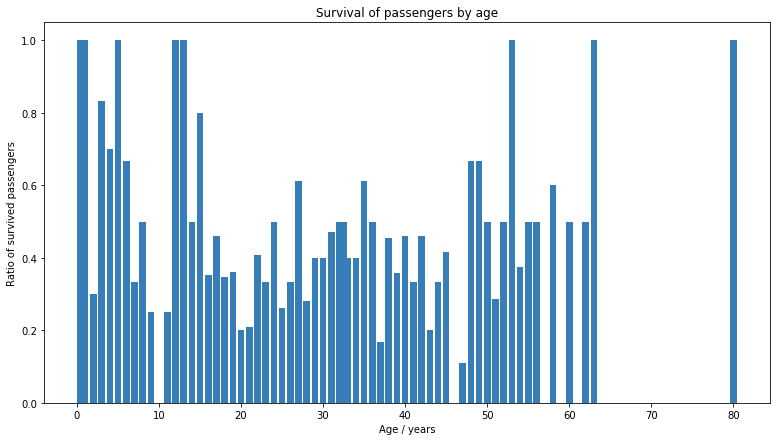

In [8]:
# Count the PassengerId grouped by the age and save it as dataframe
df=pd.DataFrame({'count' : titanic.groupby("Age")["PassengerId"].count()}).reset_index()

# Make a dictionary out of df, where age is the key and count is the value
passengers_by_age = dict(zip(df["Age"], df["count"]))

# Count the PassengerId that is grouped by survival and gernder and save it in a dataframe
df=pd.DataFrame({'count' : titanic.groupby( ["Survived","Age"])["PassengerId"].count()}).reset_index()
# New dataframe where all passengers survived
df2 = df.ix[(df['Survived'] == 1)]

# Make a dictionary where keys are the passenger age group and the values the normalized count of passengers in this age group
age_survived_norm={}
for index, row in df2.iterrows():
        age_survived_norm.update(({row["Age"]:row["count"]/float(passengers_by_age[row["Age"]])}))
    
# Plot the results
plt.figure(figsize=(13,7))
plt.bar(list(age_survived_norm.keys()), list(age_survived_norm.values()), align='center', color="#377eb8")
plt.xlabel('Age / years')
plt.ylabel('Ratio of survived passengers')
plt.title('Survival of passengers by age')
plt.show()


It can be observed that younger and older passengers regardless of their gender had an higher survival ratio than middle aged passengers.




### 3.4 Did the age considering the gender determine the chances of survival?

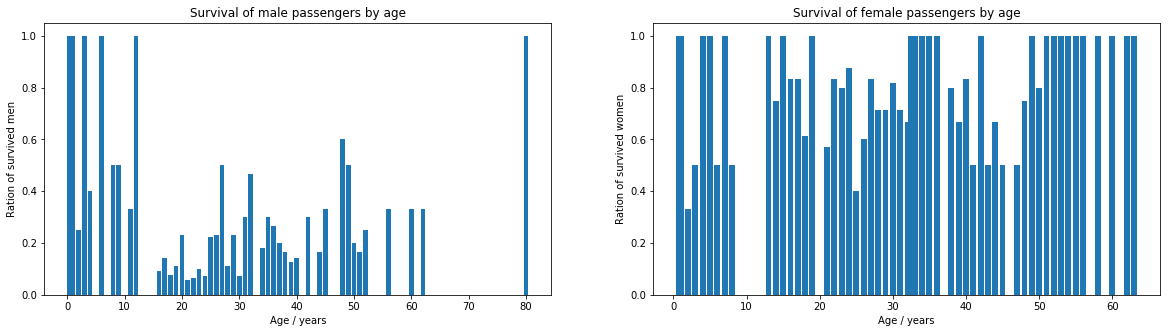

In [9]:
# Count the PassengerId grouped by age and gender and save ad dataframe
df=pd.DataFrame({'count' : titanic.groupby(["Age", "Sex"])["PassengerId"].count()}).reset_index()

# Take from df values which belong to men and save as new dataframe
df_male=df.ix[(df['Sex']=='male')]
# Take from df values which belong to women and save as new dataframe
df_women=df.ix[(df['Sex']=='female')]

# Create dictionary with age of men as the key and the count of men in this age group as value
male_by_age=dict(zip(df_male["Age"], df_male["count"]))
# Create dictionary with age of women as the key and the count of women in this age group as value
female_by_age=dict(zip(df_women["Age"], df_women["count"]))

#Count the PassengerId grouped by survival, age and gender and save as dataframe
df=pd.DataFrame({'count' : titanic.groupby( ["Survived","Age", "Sex"])["PassengerId"].count()}).reset_index()

#Create two dictionaries in which the keys are the age of men/women and the normalized count of men/women in this age group as value
male_by_age_survived={}
female_by_age_survived={}
for index, row in df.iterrows():
    if row["Survived"]==1:
        if row["Sex"]=="male":
            male_by_age_survived.update(({row["Age"]:row["count"]/float(male_by_age[row["Age"]])}))
        else:
             female_by_age_survived.update(({row["Age"]:row["count"]/float(female_by_age[row["Age"]])}))
                
# Plot the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].bar(list(male_by_age_survived.keys()), list(male_by_age_survived.values()), align='center')
axes[0].set_xlabel('Age / years')
axes[0].set_ylabel('Ration of survived men')
axes[0].set_title('Survival of male passengers by age')

axes[1].bar(list(female_by_age_survived.keys()), list(female_by_age_survived.values()), align='center')
axes[1].set_xlabel('Age / years')
axes[1].set_ylabel('Ration of survived women')
axes[1].set_title('Survival of female passengers by age')
plt.show()

If we take the gender into account it can be seen that male passengers in their middle ages had a much lower ratio of survival than women. Male children had however still big chances for survival.
In oppositve female passengers had throughout all age groupes higher survival ratio than male passengers.

### 3.5 Did the number of children aboard per passenger determine the chances of survival?

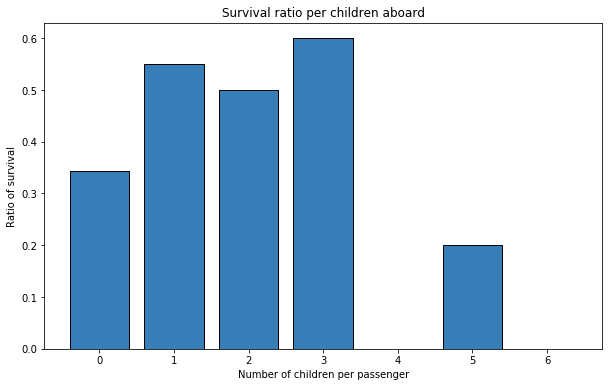

In [10]:
# How many passengers do have how many children? Create new dataframe and transform it's columns to a dictionary
parch_count=pd.DataFrame({'count' : titanic.groupby("Parch")["PassengerId"].count()}).reset_index()
parch_count=dict(zip(parch_count["Parch"],parch_count["count"]))

# Same dataframe as above but also grouped by survival
df=pd.DataFrame({'count' : titanic.groupby(["Survived","Parch"])["PassengerId"].count()}).reset_index()

# Calculate the survival ratio per children aboard
surival_ratio={}
for index, row in df.iterrows():
    if not row["Survived"]:
        surival_ratio[row["Parch"]]=1-(row["count"]/float(parch_count[row["Parch"]]))
          
    
plt.figure(figsize=(10,6))      
plt.bar(list(surival_ratio.keys()),list(surival_ratio.values()),color='#377eb8', edgecolor = "Black")
plt.title("Survival ratio per children aboard")
plt.xlabel("Number of children per passenger")
plt.ylabel("Ratio of survival")
plt.show()


The plot shows the tendency that higher number of children increased the chances of parents`s survival. The reason for this may be the fact that parents who had more children had higher chances to get a seat in the saving boats.

## 4. Conclusion

After the examination of the data I came to the conclustion that the gender, age and social economic status were factors that determined the survival of the passengers the most.

Female passengers had much higher survival ratio than men. Women usually survived throughout all age groups more often than men. Only younger and older men had significantly higher chances to survive. Especially middle aged men were the most common group of passengers who died. This observation confirms the usual procedure that women, children and the elderly receive access to lifeboats first. 
Besides the age and gender the wealth determined the chances of survival. More wealthy passengers had survived more often than poorer passengers. It seems that passengers with higher social economic status have been prefered during the evacuation. Also the higher number of children per passenger was a small factor that increased the chances for survival. 

However these results should be viewed critically. The used dataset contains only 891 out of 2224 [1] passengers that were aboard the titanic. So only 40 % of the passengers were considered during the data analysis. 
An other problem was the fact that almost 20 % of the passengers in the used dataset did not have an entry for their age. I had to neglect those missing values. It means that I used roughly only 32 % of all titanic passengers with an age entry to determine the effect of age on the survival for all passengers. A possible solution for dealing with the missing ages is substituting those with the mean of all available ages.
The analysis cound be enriched by using the whole dataset that contain the information for all of 2224 passengers.

For further analysis it would be interesting to implement a machine learning model that learns to predict whether a passenger might have survived based on the passenger features. An example for such an model is a Naive Bayes classifier or Support Vector Machine. 












## 5. References

[1] https://www.kaggle.com/c/titanic#description